<a href="https://colab.research.google.com/github/DangLeHoangVinh/DA_Machine-Learning/blob/main/Default_Prediction___Final_Project__Short_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Thư viện
import numpy as np
import pandas as pd

# thư viện vẽ chart
import matplotlib.pyplot as plt
import seaborn as sns

# thu vien xu ly du lieu
from sklearn.preprocessing import LabelEncoder


# Thu vien Training model:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Thư viện đánh giá model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


Data Loading and Understanding

In [ ]:
#------------------------------------ 1) Import Data ----------------------------------------------

In [ ]:
#Load data:
link = "https://drive.google.com/file/d/1c8yS2JJT9xv0KDT7x_YVM6naQggRHYgn/view?usp=share_link" #small data _ 10000 data
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
# data = pd.read_csv(path,encoding= 'unicode_escape',delimiter =",")
data = pd.read_csv(path,encoding ='unicode_escape')
# chưa đọc được tập data lớn

In [ ]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,839167,1049321,10000,10000,10000.0,60 months,16.89,247.94,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9996,839584,1049747,10000,10000,10000.0,60 months,22.11,276.82,G,G1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,838792,1048909,10000,10000,10000.0,36 months,13.49,339.31,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,839583,1049746,15000,15000,15000.0,36 months,14.79,518.44,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#chiết xuất dữ liệu
using_columns = ['loan_amnt','term','int_rate','installment','grade','annual_inc','purpose','default_ind']
model_data = data[using_columns]

In [ ]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_amnt    10000 non-null  int64  
 1   term         10000 non-null  object 
 2   int_rate     10000 non-null  float64
 3   installment  10000 non-null  float64
 4   grade        10000 non-null  object 
 5   annual_inc   10000 non-null  float64
 6   purpose      10000 non-null  object 
 7   default_ind  10000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


Xử lý dữ liệu

In [ ]:
model_data[['loan_amnt','installment']].describe()

,loan_amnt,installment
count,10000.000000,10000.000000
mean,12838.905000,363.463847
std,8497.110648,226.630111
min,1000.000000,22.240000
25%,6000.000000,193.350000
50%,11200.000000,322.185000
75%,17412.500000,480.330000
max,35000.000000,1288.100000


In [ ]:
# -------------------------- 2) EDA_Data Cleaning:-----------------------------------------

In [ ]:
#--------------------- 2.1 Converting Data Types ----------------------
print("Data types:")
model_data.info()

#--------------------- 2.2 Inconsistent data -------------------------
#No in consistent data

# ---------------------- 2.3 Removing Duplicates --------------------------
print("\nDuplicates Values:")
print(data.duplicated().sum())
print(model_data.duplicated().sum())
# các cột dữ liệu có sự trùng
#tuy nhiên đó là khoản vay do những người khác nhau thực hiện nên không tính là duplicate

#---------------------- 2.4 Handling Missing Values ---------------------
print("\nNull Values:")
print(model_data[model_data.isna()].count())

# không có nan value _ giả sử có, fill với giá trị Mean
mean = data['loan_amnt'].mean()
model_data['loan_amnt'].fillna(mean,inplace=True)



Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_amnt    10000 non-null  int64  
 1   term         10000 non-null  object 
 2   int_rate     10000 non-null  float64
 3   installment  10000 non-null  float64
 4   grade        10000 non-null  object 
 5   annual_inc   10000 non-null  float64
 6   purpose      10000 non-null  object 
 7   default_ind  10000 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB

Duplicates Values:
0
102

Null Values:
loan_amnt      0
term           0
int_rate       0
installment    0
grade          0
annual_inc     0
purpose        0
default_ind    0
dtype: int64


<ipython-input-8-28add341a109>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['loan_amnt'].fillna(mean,inplace=True)


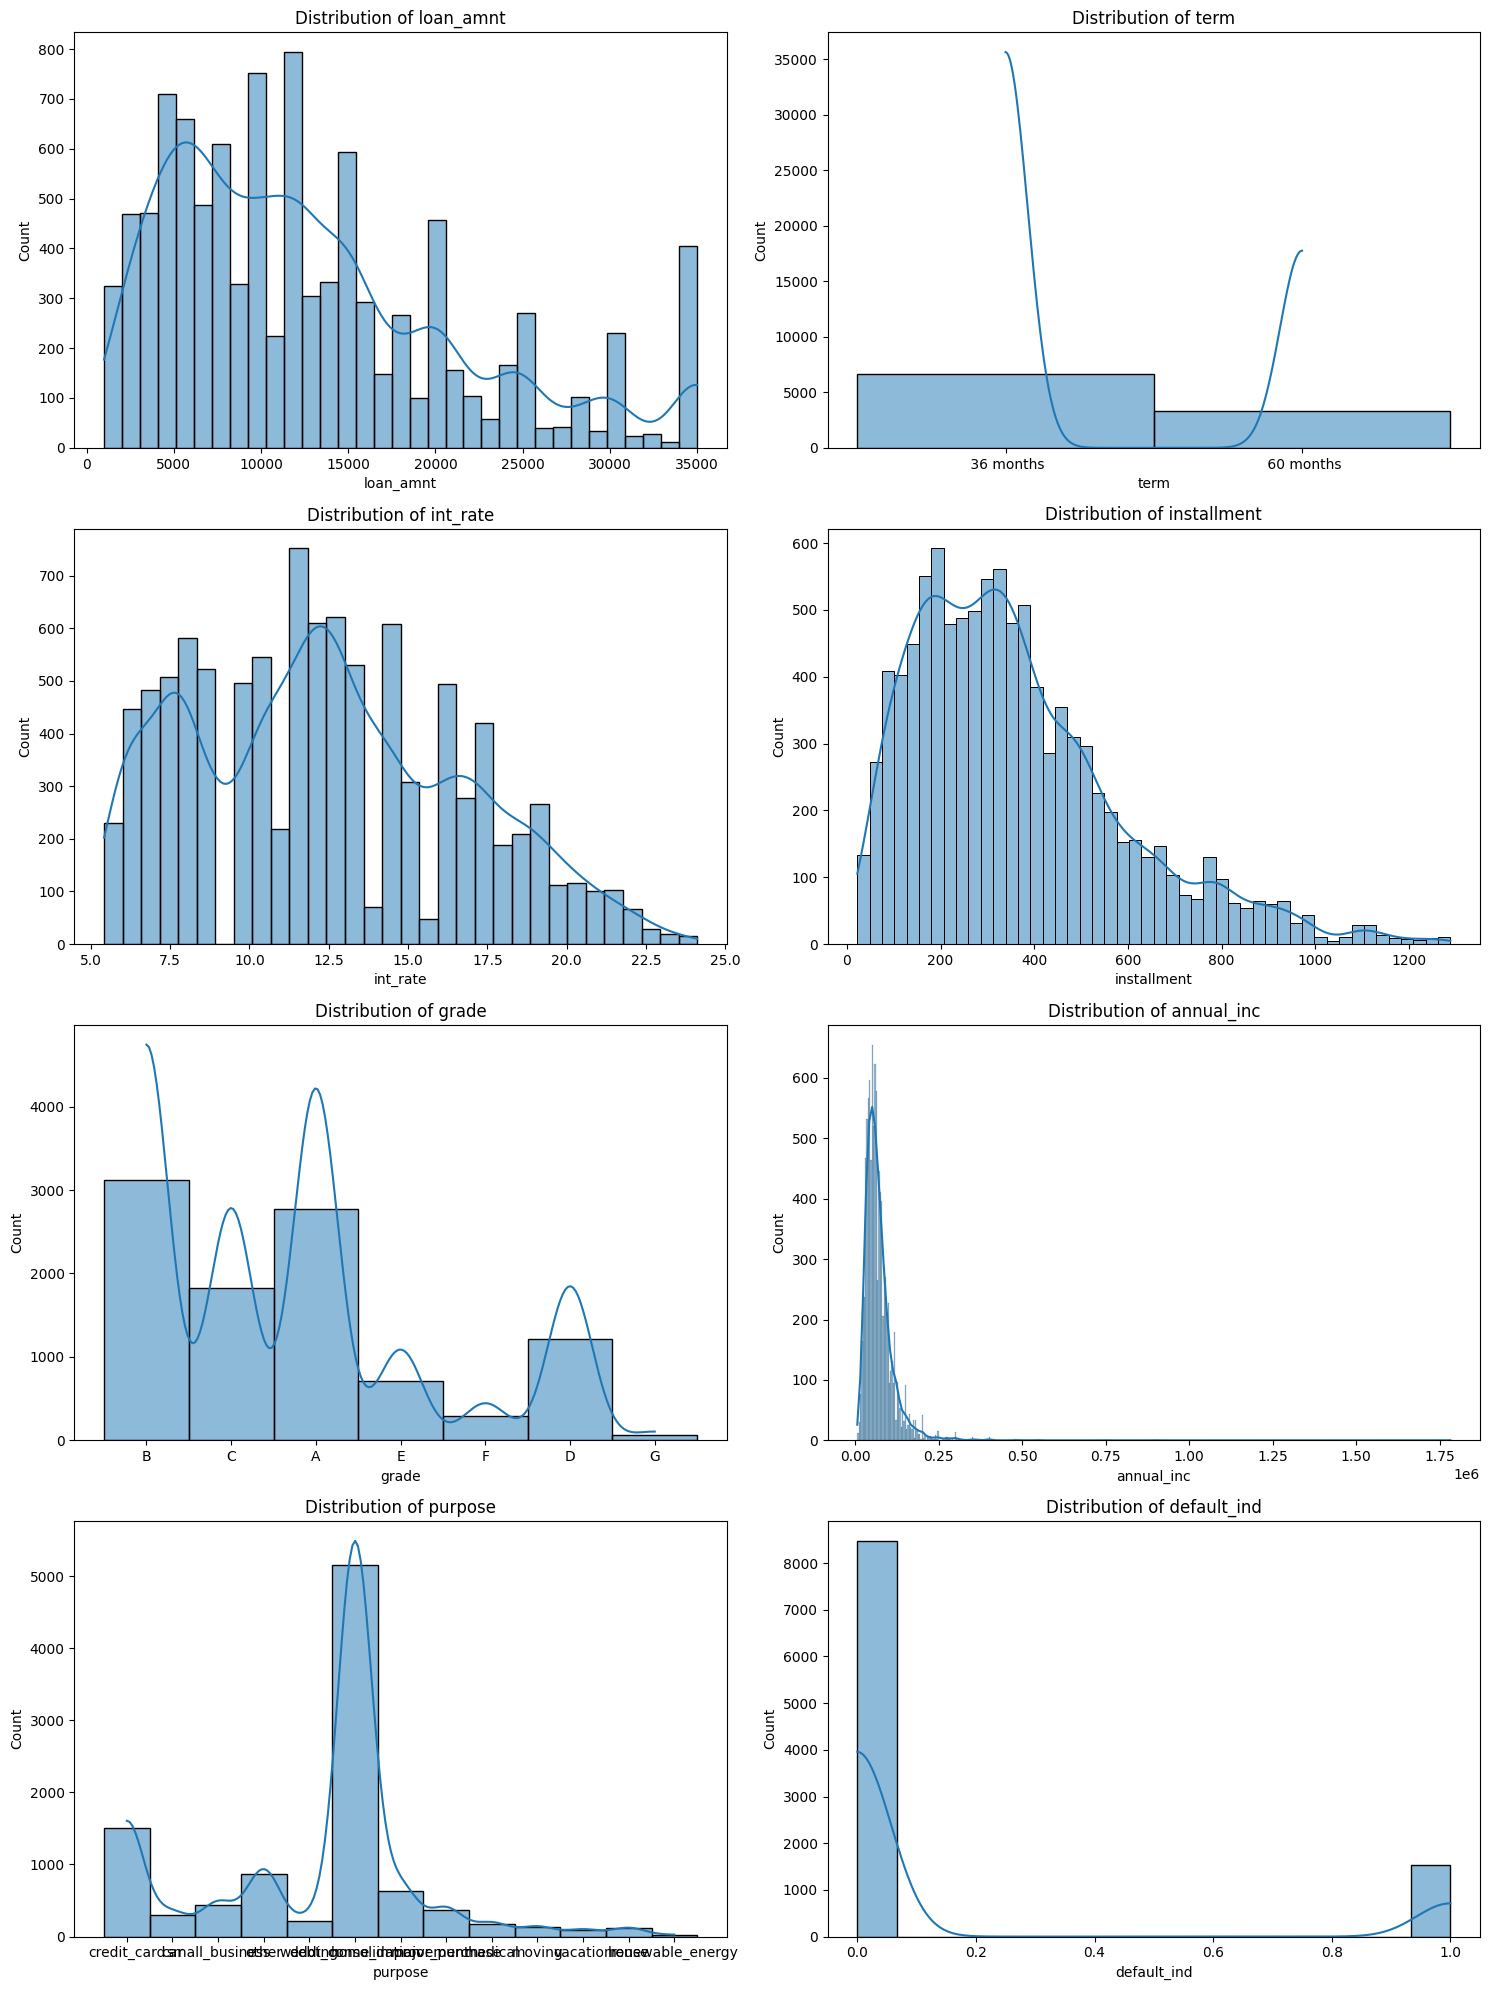

In [ ]:
#---------------------- 2.5 Identfify outliers ---------------------------

# ---------------------- Check -----------------------------
# Tạo figure và các subplot
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Chuyển đổi axes thành một mảng 1 chiều để dễ truy cập
axes = axes.ravel()

# Vẽ các biểu đồ phân phối cho mỗi biến
for i, column in enumerate(model_data.columns):
    sns.histplot(model_data[column], kde = True , ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Điều chỉnh layout để tránh overlap
plt.tight_layout()
plt.show()


In [ ]:
#-------------------------- Weight of Evidence And Information Value -------------------

Function tính Woe và Information value

In [ ]:
# Function _ Tính Weight of Evidence và Information value
def calc_iv(data,feature,target,pr = False): # pr: biến xem có cần in kết quả ra hay không
  result_list = []
  data[feature] = data[feature].fillna("NULL")

  for i in data[feature].unique(): # mõi unique value là một bin
    result_list.append([   # tạo ra một bảng gồm các cột chứa: tên feature đang xử lý, tên bin (i), tổng số event + non-event, số lượng non - events(Good), số lượng event (Bad)
        feature,
        i,
        data[data[feature] == i].count()[feature],
        data[(data[feature] == i) & (data[target] == 0)].count()[feature],
        data[(data[feature] == i) & (data[target] == 1)].count()[feature]    # Data Bad = 1, Good = 0
    ])
  result = pd.DataFrame(result_list, columns =['Variable', 'Value', 'All', 'Good', 'Bad'])
  result['share'] = result['All']/result['All'].sum() # phần trăm data của từng bin trong tổng thể
  result['Bad_rate'] = result['Bad']/result['All'] #phần trăm data Bad trong tổng thể _ để tham khảo thôi
  result['Good_Distribution'] = (result['All'] - result['Bad']) / (result['All'].sum() - result['Bad'].sum()) # Phần trăm data Good trong tổng thể Data Good
  result['Bad_Distribution'] = result['Bad']/result['Bad'].sum() # Phần trăm Data Bad trong tổng thể Bad

  result['WoE'] = np.log(result['Good_Distribution'] / result['Bad_Distribution']) # np.log() là hàm dùng để tính logarit tự nhiên trong numpy

  result = result.replace({'WoE': {np.inf: 0, -np.inf: 0}}) # Loại bỏ các biến vô cùng
  result['IV'] = result['WoE'] * (result['Bad_Distribution'] - result['Bad_Distribution'])

# Custom lại bảng cho dễ nhìn
  result = result.sort_values(by=['Variable', 'Value'], ascending=[True, True]) # sắp xếp mảng dữ liệu tăng dần
  result.index = range(len(result.index)) # đánh index lại

# In dữ liệu
  if pr:
      print(result)
      print('IV = ', result['IV'].sum())

  iv = result['IV'].sum()
  print('This variable\'s IV is:',iv)
  print(data[feature].value_counts())
# Trả dữ liệu về
  return iv, result


#test thêm gini + chỉ số đánh giá woe

In [ ]:
#---------------------------- 3) Data Engineering ------------------------------------------

In [ ]:
#--------------------------- 3.1 Feature Extraction --------------------------

In [ ]:
#------------------------------3.2 Feature Encoding ---------------------------

In [ ]:
#xử lý Purpose bằng Woe encoding
iv, data = calc_iv(model_data,'purpose','default_ind')
woe_dict = data.set_index('Value')['WoE'].to_dict()
model_data['purpose'] = model_data['purpose'].map(woe_dict)

#xử lý Purpose bằng Woe encoding
iv, data = calc_iv(model_data,'grade','default_ind')

woe_dict = data.set_index('Value')['WoE'].to_dict()
model_data['grade'] = model_data['grade'].map(woe_dict)

#xử lý Term bằng Woe encoding
iv, data = calc_iv(model_data,'term','default_ind')

woe_dict = data.set_index('Value')['WoE'].to_dict()
model_data['term'] = model_data['term'].map(woe_dict)


<ipython-input-14-3908a4bf93bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = data[feature].fillna("NULL")
<ipython-input-15-84495823b423>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['purpose'] = model_data['purpose'].map(woe_dict)
<ipython-input-15-84495823b423>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

This variable's IV is: 0.0
purpose
debt_consolidation    5150
credit_card           1505
other                  864
home_improvement       630
small_business         436
major_purchase         366
car                    300
wedding                217
medical                177
moving                 129
house                  113
vacation                91
renewable_energy        22
Name: count, dtype: int64
This variable's IV is: 0.0
grade
B    3116
A    2772
C    1826
D    1214
E     713
F     291
G      68
Name: count, dtype: int64
This variable's IV is: 0.0
term
 36 months    6674
 60 months    3326
Name: count, dtype: int64


<ipython-input-15-84495823b423>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['term'] = model_data['term'].map(woe_dict)


In [ ]:
model_data

,loan_amnt,term,int_rate,installment,grade,annual_inc,purpose,default_ind
0,5000,0.338832,10.65,162.87,0.252200,24000.0,0.305798,0
1,2500,-0.509320,15.27,59.83,-0.159412,30000.0,0.214858,1
2,2400,0.338832,15.96,84.33,-0.159412,12252.0,-0.617288,0
3,10000,0.338832,13.49,339.31,-0.159412,49200.0,-0.241948,0
4,3000,-0.509320,12.69,67.79,0.252200,80000.0,-0.241948,0
...,...,...,...,...,...,...,...,...
9995,10000,-0.509320,16.89,247.94,-0.543429,60000.0,-0.067751,1
9996,10000,-0.509320,22.11,276.82,-1.298165,40008.0,0.736887,0
9997,10000,0.338832,13.49,339.31,-0.159412,87600.0,-0.067751,0
9998,15000,0.338832,14.79,518.44,-0.159412,116500.0,0.305798,0


In [ ]:
#-------------------------------------- 4. Training model -----------------------------------

In [ ]:
#------------------------ 4.1 Train test split --------------------------

In [ ]:
X = model_data.drop('default_ind',axis = 1)
Y = model_data['default_ind']

In [ ]:
x_train,x_test = train_test_split(X,test_size = 0.3,random_state = 42)
y_train,y_test = train_test_split(Y,test_size = 0.3, random_state = 42)

In [ ]:
X

,loan_amnt,term,int_rate,installment,grade,annual_inc,purpose
0,-0.978780,0.70594,-0.341987,-0.913569,0.140503,-1.744971,1.001133
1,-1.682576,-1.41655,0.720845,-1.977759,-0.572646,-1.311154,0.713430
2,-1.719871,0.70594,0.864868,-1.649482,-0.572646,-3.086376,-2.666024
3,-0.119547,0.70594,0.333057,0.106146,-0.572646,-0.368466,-0.968170
4,-1.510655,-1.41655,0.150435,-1.862318,0.140503,0.534255,-0.968170
...,...,...,...,...,...,...,...
9995,-0.119547,-1.41655,1.053907,-0.358762,-1.134206,0.002746,-0.274361
9996,-0.119547,-1.41655,2.023633,-0.200771,-2.068032,-0.759462,2.228229
9997,-0.119547,0.70594,0.333057,0.106146,-0.572646,0.700252,-0.274361
9998,0.471842,0.70594,0.618653,0.813071,-0.572646,1.216356,1.001133


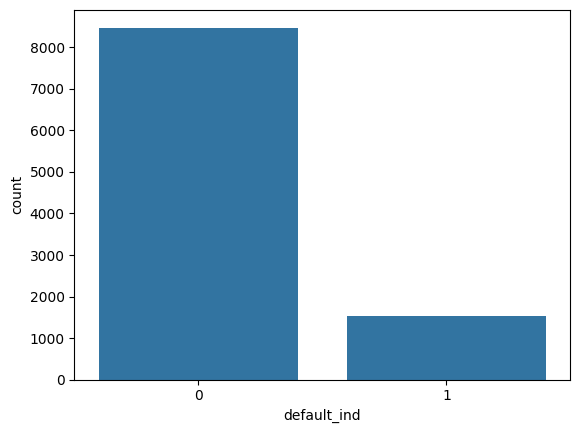

In [ ]:
#----------------------- 4.2 Check Imbalance ---------------------------
sns.countplot(data = model_data, x='default_ind')
plt.show()

In [ ]:
# Xử lý imbalance bằng over sampling
smote = SMOTE(random_state = 42)
x_test, y_test = smote.fit_resample(x_test,y_test)
x_balanced, y_balanced = smote.fit_resample(x_train,y_train)

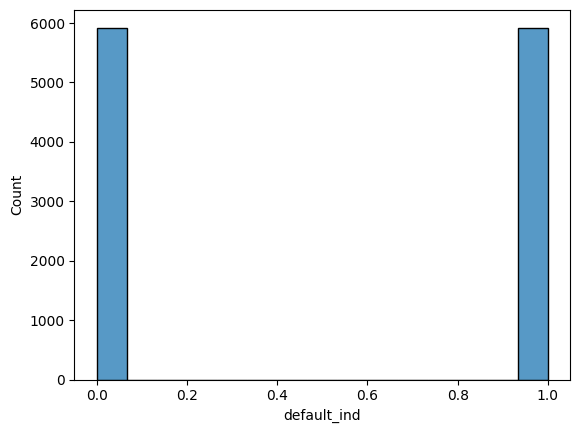

In [ ]:
sns.histplot(y_balanced)
plt.show()

In [ ]:
#----------------------- 4.3 Apply Model ------------------------------

In [ ]:
# Tìm chỉ số tốt nhất cho logistic - 10p
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Khởi tạo Logistic Regression
log_reg = LogisticRegression()

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(x_balanced, y_balanced) # chạy khá lâu, nhưng mà cần để chọn best_params_

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

KeyboardInterrupt: 

In [ ]:
# predict _ Best paramater:
"""
Best Parameters: {'C': 10, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.7335793601043762
"""

#grid_search.fit(x_balanced, y_balanced)
#y_pred_logistic = grid_search.best_estimator_.predict(x_test)

log_reg = LogisticRegression(C= 10, max_iter = 300, penalty = 'l1', solver= 'liblinear')
log_reg.fit(x_balanced, y_balanced)
y_pred_logistic = log_reg.predict(x_test)

y_pred_logistic = pd.DataFrame(y_pred_logistic)

# In ma trận nhầm lẫn và báo cáo phân loại
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Confusion Matrix:
 [[1668  884]
 [ 857 1695]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      2552
           1       0.66      0.66      0.66      2552

    accuracy                           0.66      5104
   macro avg       0.66      0.66      0.66      5104
weighted avg       0.66      0.66      0.66      5104



In [ ]:
# y_pred_logistic.rename(columns ={'0':'default_ind'},inplace=True)

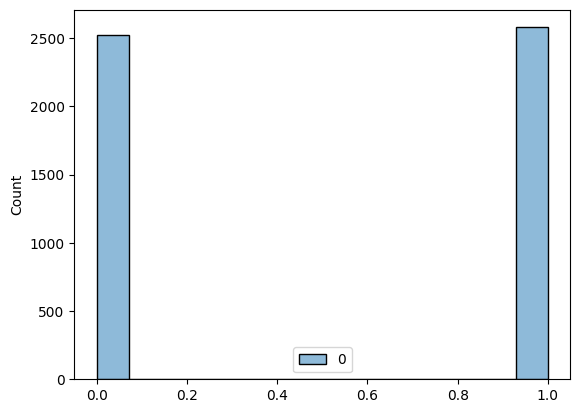

In [ ]:
sns.histplot(y_pred_logistic)
plt.show()

In [ ]:
accuracy_score(y_test,y_pred_logistic)

0.6588949843260188

In [ ]:
#----------------------- Random forest -------------------------- 0.72

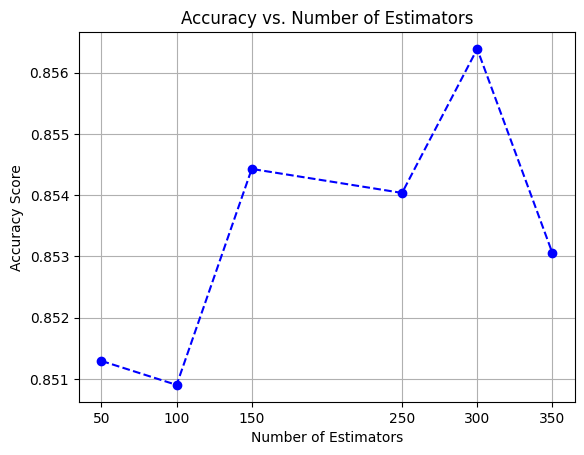

In [ ]:
#--------------- Test parameter bằng for ----------------- 14 - 30s cho 10k data
estimators = [50,100,150,250,300,350]
accuracy = []

for i in estimators:
    model_forest = RandomForestClassifier(n_estimators=i)
    model_forest.fit(x_balanced,y_balanced)
    y_pred_forest = model_forest.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred_forest))

# Vẽ đồ thị để xem sự thay đổi của accuracy_scores
plt.plot(estimators, accuracy, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs. Number of Estimators')
plt.grid(True)
plt.xticks(estimators)
plt.show()

#chay hoi lau khoan 5-10p voi random forest _ best ~150 (dữ liệu tông 800k data)


In [ ]:
#Train model estimator = 250 - 300 using WOE
model_forest= RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 300)
model_forest.fit(x_balanced,y_balanced)
y_pred_forest = model_forest.predict(x_test)
confusion_matrix(y_test, y_pred_forest)

array([[2285,  267],
       [ 503, 2049]])

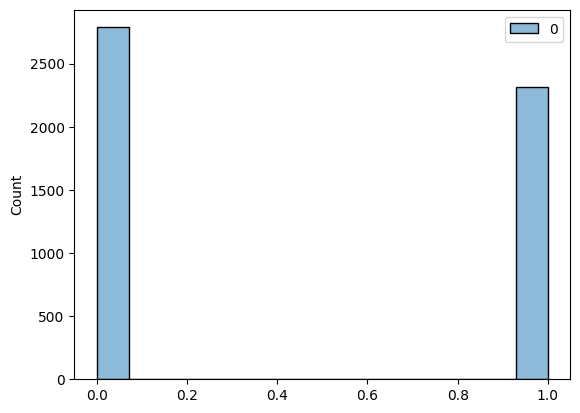

In [ ]:
y_pred_forest = pd.DataFrame(y_pred_forest)
sns.histplot(y_pred_forest)
plt.show()

In [ ]:
accuracy_score(y_test,y_pred_forest)

0.8491379310344828

In [ ]:
#test bang Grid Search CV _ khoảng 4-5p cho 10k data
param_grid = {
    'n_estimators': [100, 150, 250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Huấn luyện GridSearchCV
grid_search.fit(x_train, y_train)

# In kết quả
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

#best depth_10, min split 2, estimaters:100 acc = .845

KeyboardInterrupt: 

In [ ]:
#----------------------- Gradient Boosting -------------------------- 0.792

In [ ]:
# Grid Search CV - 3-4m
param_grid = {
    'n_estimators': [100,150,250]
    , 'learning_rate': [0.1,0.2]
    ,'max_depth': [2,3,4]
}
gbm = GradientBoostingRegressor(random_state=42)
gbm_gridsearch = GridSearchCV(estimator = gbm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gbm_gridsearch.fit(x_balanced,y_balanced)

# In kết quả
print("Best Parameters:", gbm_gridsearch.best_params_)
print("Best Accuracy:", gbm_gridsearch.best_score_)

#best: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best Accuracy: nan


In [ ]:
y_pred_gbm = gbm_gridsearch.predict(x_test)
#có kết quả âm

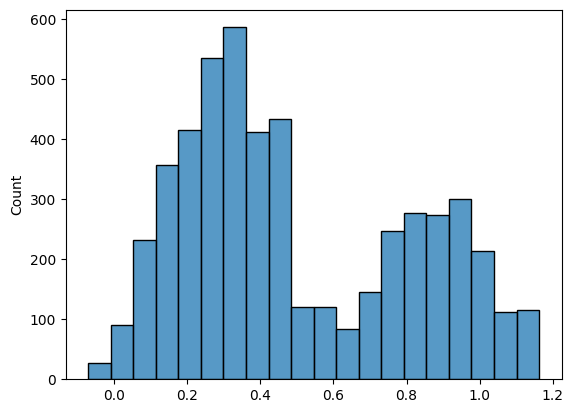

In [ ]:
sns.histplot(y_pred_gbm)
plt.show()

In [ ]:
# chuyển sang nhị phân
threshold = 0.5
y_pred_binary = (y_pred_gbm > threshold).astype(int)
# có thể chuyển là do, biểu thức là so sánh => trả về True hoặc False, khi ép kiểu sang int => True =1, False =0

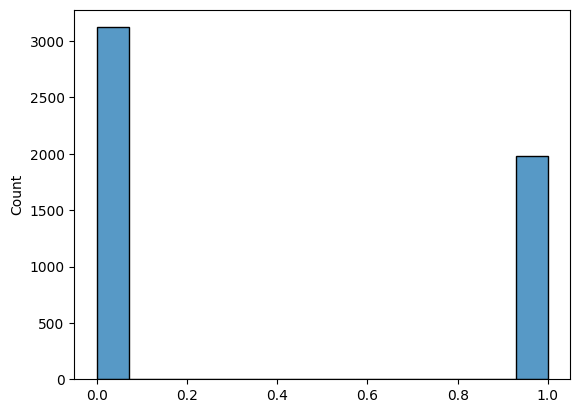

In [ ]:
sns.histplot(y_pred_binary)
plt.show()

In [ ]:
accuracy_score(y_test,y_pred_binary)

0.8644200626959248

In [ ]:
#---------------- XGBoost (Extreme Gradient Boosting) ------------------------

In [ ]:
#XGBoost

In [ ]:
#Chuyển đổi về DMatrix
dtrain = xgb.DMatrix(x_balanced, label = y_balanced)
dtest = xgb.DMatrix(x_test, label = y_test)

In [ ]:
#định nghĩa tham số:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic', # thay cho reg:squarederror
    'eval_metric': 'auc' # thay cho rmse 0.847 _ không khác mấy
}
num_rounds = 100
model_xgb = xgb.train(params,dtrain,num_rounds)

In [ ]:
y_pred_xgb = model_xgb.predict(dtest)

In [ ]:
mean_squared_error(y_test,y_pred_xgb)

0.09814365044957611

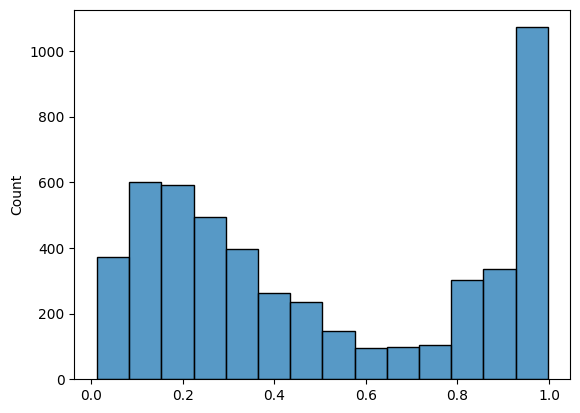

In [ ]:
sns.histplot(y_pred_xgb)
plt.show()

In [ ]:
#threshhold chuyển từ % về 0 và 1
y_pred_xgb = pd.DataFrame(data=y_pred_xgb,columns=['predicted']) # chuyển sang dataframe mới apply lambda được _ or lambda cho arr numpy _ gg for more
Threshold = 0.5
y_pred_xgb_int= y_pred_xgb['predicted'].apply(lambda x: 1 if x> Threshold else 0)
# or y_pred_xgb_int = (y_pred_xgb['Prediected] > Threshold).astype(int)

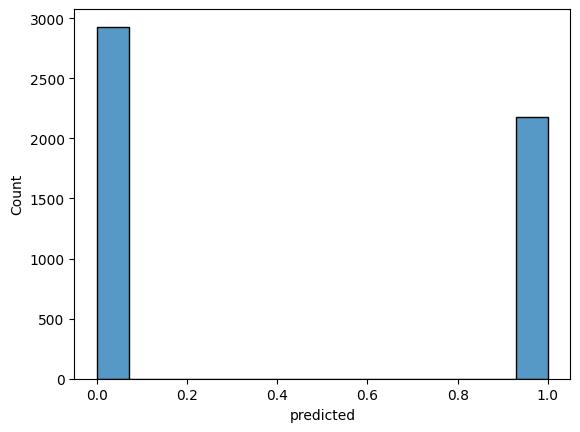

In [ ]:
sns.histplot(y_pred_xgb_int)
plt.show()

In [ ]:
accuracy_score(y_test,y_pred_xgb_int)

0.8708855799373041

In [ ]:
# XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8,
                      subsample=0.8,
                      learning_rate =0.02,
                      seed=42)

model.fit(x_balanced, y_balanced)
y_pred_xgbclas = model.predict(x_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_pred_xgbclas)))
print(pd.DataFrame(confusion_matrix(y_test,y_pred_xgbclas)))

Accuracy Score is 0.86991
      0     1
0  2430   122
1   542  2010


In [ ]:
# Light GBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()

lgb_model.fit(x_balanced, y_balanced)

y_pred = lgb_model.predict(x_test)

[LightGBM] [Info] Number of positive: 5924, number of negative: 5924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1426
[LightGBM] [Info] Number of data points in the train set: 11848, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Accuracy: 0.8364
F1-Score: 0.828224645134746
Confusion Matrix:
[[2256  296]
 [ 539 2013]]


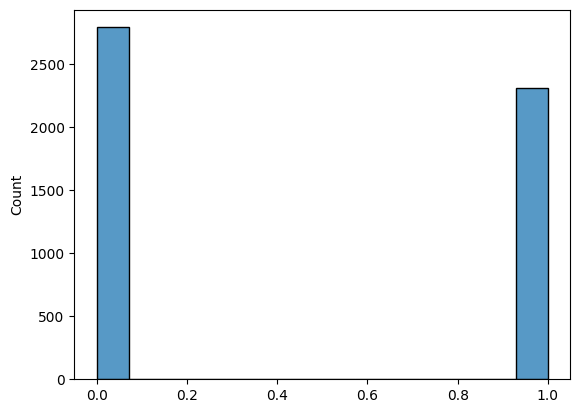

In [ ]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print('F1-Score:',f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


sns.histplot(y_pred)
plt.show()


In [ ]:
# mô hình có độ chính xác cao nhất là Light GBM với độ chính xác ~0.89
# có đưa về phân phối chuẩn hay không cũng không ảnh hưởng nhiều đến độ chính xác của mô hình
#- nguyên nhân do mô hình classifier ít bị ảnh hưởng bởi phân phối (chuẩn hay không) của dữ liệu như linear hay hay logistic regestion